### Building an Image Classifier Using the Sequential API

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Let's build the neural network

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

## Alternative way to do it:

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

These are some of the model methods:

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.layers

In [7]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [8]:
model.get_layer('dense') is hidden1

True

In [9]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.06997457,  0.00503626, -0.0120313 , ..., -0.01850743,
         0.01438673,  0.00904734],
       [ 0.05782476,  0.00510928, -0.0012336 , ...,  0.04284978,
         0.06426327,  0.07169861],
       [-0.01166725, -0.02677018,  0.00475802, ...,  0.03754696,
        -0.04634653, -0.00237418],
       ...,
       [-0.02262454, -0.01332553, -0.01885834, ...,  0.03205212,
        -0.03530096, -0.04168138],
       [-0.03289982, -0.04897187,  0.03374602, ..., -0.0426114 ,
        -0.009567  ,  0.01158502],
       [ 0.00964224, -0.01821639, -0.01011404, ..., -0.05440677,
         0.01221596, -0.06403889]], dtype=float32)

After the model is created we need to compile it specifying the loss function and optimizer

In [10]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.9788 - accuracy: 0.6855 - val_loss: 0.5139 - val_accuracy: 0.8248
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5027 - accuracy: 0.8257 - val_loss: 0.4369 - val_accuracy: 0.8544
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4510 - accuracy: 0.8428 - val_loss: 0.4369 - val_accuracy: 0.8532
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4184 - accuracy: 0.8519 - val_loss: 0.3955 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4032 - accuracy: 0.8585 - val_loss: 0.3798 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3847 - accuracy: 0.8650 - val_loss: 0.3810 - val_accuracy: 0.8690
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3630 - accuracy: 0.8723 - val_loss: 0.3785 - val_accuracy:

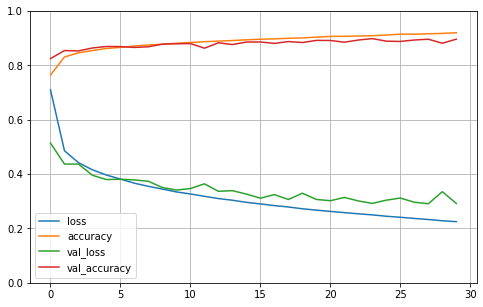

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 58.5478 - accuracy: 0.8608


[58.54775619506836, 0.86080002784729]

In [14]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

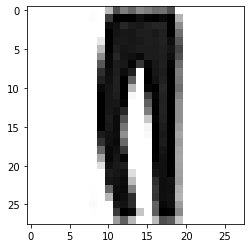

In [15]:
plt.imshow(X_new[2].reshape((28,28)),cmap='binary')

In [16]:
class_names[np.argmax(y_proba[2])]

'Trouser'

### Building a Regression MLP Using the Sequential API

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [18]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [20]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 864us/step - loss: 4.6045 - val_loss: 0.5100
Epoch 2/20
363/363 [==============================] - 0s 634us/step - loss: 0.5221 - val_loss: 0.4220
Epoch 3/20
363/363 [==============================] - 0s 660us/step - loss: 0.4602 - val_loss: 0.4085
Epoch 4/20
363/363 [==============================] - 0s 650us/step - loss: 0.4253 - val_loss: 0.4102
Epoch 5/20
363/363 [==============================] - 0s 642us/step - loss: 0.4334 - val_loss: 0.3874
Epoch 6/20
363/363 [==============================] - 0s 643us/step - loss: 0.3989 - val_loss: 0.3871
Epoch 7/20
363/363 [==============================] - 0s 637us/step - loss: 0.3988 - val_loss: 0.3856
Epoch 8/20
363/363 [==============================] - 0s 642us/step - loss: 0.4027 - val_loss: 0.3843
Epoch 9/20
363/363 [==============================] - 0s 647us/step - loss: 0.3944 - val_loss: 0.3781
Epoch 10/20
363/363 [==============================] - 0s 636us/step - loss: 0.396

In [21]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 470us/step - loss: 0.3610


In [22]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [23]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [24]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid,y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 828us/step - loss: 0.3702 - val_loss: 0.3542
Epoch 2/30
363/363 [==============================] - 0s 651us/step - loss: 0.3689 - val_loss: 0.3537
Epoch 3/30
363/363 [==============================] - 0s 662us/step - loss: 0.3696 - val_loss: 0.3476
Epoch 4/30
363/363 [==============================] - 0s 657us/step - loss: 0.3666 - val_loss: 0.3420
Epoch 5/30
363/363 [==============================] - 0s 651us/step - loss: 0.3620 - val_loss: 0.3542
Epoch 6/30
363/363 [==============================] - 0s 679us/step - loss: 0.3615 - val_loss: 0.3456
Epoch 7/30
363/363 [==============================] - 0s 626us/step - loss: 0.3602 - val_loss: 0.3402
Epoch 8/30
363/363 [==============================] - 0s 827us/step - loss: 0.3618 - val_loss: 0.3372
Epoch 9/30
363/363 [==============================] - 0s 861us/step - loss: 0.3626 - val_loss: 0.3379
Epoch 10/30
363/363 [==============================] - 0s 726us/step - loss: 0.357